In [1]:
pip install seaborn

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
new_data = pd.read_csv("C:\\Padhai\\projectdataset.csv", encoding = 'utf-8') 
new_data.rename(columns={'RiskStatus':'target'},inplace=True)
new_data.head()

,ID,Gender,Car,Realty,Income,IncomeType,EducationType,FamilyStatus,HousingType,Age,WorkExperience,WorkPhone,Phone,Email,OccupationType,target,FamilyWithChild
0,5008804,0,1,1,High,Working,Higher education,Civil marriage,Rented apartment,Low,High Experience,1,0,0,Not Defined,1,0
1,5008806,0,1,1,Low,Working,Secondary / secondary special,Married,House / apartment,Highest,Very Experienced,0,0,0,Labour Work,0,0
2,5008808,1,0,1,High,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,High,Little Experience,0,1,1,Office Workers,0,0
3,5008812,1,0,1,High,State Servant,Higher education,Separated,House / apartment,Highest,Little Experience,0,0,0,Not Defined,0,0
4,5008815,0,1,1,High,Working,Higher education,Married,House / apartment,Medium,Little Experience,1,1,1,Office Workers,0,0


In [53]:
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        
                    val,                                                           
                    df[df[feature] == val].count()[feature],                       
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) 

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [54]:
ivtable=pd.DataFrame(new_data.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','ID']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

In [55]:
print(new_data['Gender'].value_counts())
iv, data = calc_iv(new_data,'Gender','target')
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

1    6323
0    3386
Name: Gender, dtype: int64
This variable's IV is: 0.0006866034140712544
1    6323
0    3386
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,3386,2915,422,0.348749,0.124631,0.347235,0.359761,-0.035438,0.000444
1,Gender,1,6323,5511,751,0.651251,0.118773,0.652765,0.640239,0.019376,0.000243


In [56]:
print(new_data['Car'].value_counts())
iv, data=calc_iv(new_data,'Car','target')
ivtable.loc[ivtable['variable']=='Car','IV']=iv
data.head()

0    6139
1    3570
Name: Car, dtype: int64
This variable's IV is: 0.00035209906440836745
0    6139
1    3570
Name: Car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Car,0,6139,5317,751,0.6323,0.122333,0.631209,0.640239,-0.014204,0.000128
1,Car,1,3570,3109,422,0.3677,0.118207,0.368791,0.359761,0.024789,0.000224


In [57]:
print(new_data['Realty'].value_counts())
iv, data=calc_iv(new_data,'Realty','target')
ivtable.loc[ivtable['variable']=='Realty','IV']=iv
data.head()

1    6520
0    3189
Name: Realty, dtype: int64
This variable's IV is: 0.004760827697631725
1    6520
0    3189
Name: Realty, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Realty,0,3189,2724,419,0.328458,0.131389,0.324508,0.357204,-0.095996,0.003139
1,Realty,1,6520,5702,754,0.671542,0.115644,0.675492,0.642796,0.049614,0.001622


In [58]:
print(new_data['Phone'].value_counts(normalize=True,sort=False))
new_data.drop(new_data[new_data['Phone'] == 'nan' ].index, inplace=True)
iv, data=calc_iv(new_data,'Phone','target')
ivtable.loc[ivtable['variable']=='Phone','IV']=iv
data.head()

0    0.712329
1    0.287671
Name: Phone, dtype: float64
This variable's IV is: 0.002145306819769305
0    6916
1    2793
Name: Phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Phone,0,6916,5988,857,0.712329,0.123916,0.709817,0.730605,-0.028866,0.000600
1,Phone,1,2793,2438,316,0.287671,0.113140,0.290183,0.269395,0.074333,0.001545


In [59]:
print(new_data['Email'].value_counts(normalize=True,sort=False))
new_data['Email']=new_data['Email'].astype(str)
iv, data=calc_iv(new_data,'Email','target')
ivtable.loc[ivtable['variable']=='Email','IV']=iv
data.head()

0    0.912452
1    0.087548
Name: Email, dtype: float64
This variable's IV is: 0.0007878847446532737
0    8859
1     850
Name: Email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Email,0,8859,7695,1062,0.912452,0.119878,0.913425,0.905371,0.008857,0.000071
1,Email,1,850,731,111,0.087548,0.130588,0.086575,0.094629,-0.088960,0.000717


In [60]:
iv, data = calc_iv(new_data,'WorkPhone','target')
new_data.drop(new_data[new_data['WorkPhone'] == 'nan' ].index, inplace=True)
ivtable.loc[ivtable['variable']=='WorkPhone','IV']=iv
data.head()

This variable's IV is: 6.007781844470279e-06
0    7598
1    2111
Name: WorkPhone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,WorkPhone,0,7598,6590,919,0.782573,0.120953,0.782451,0.783461,-0.001291,0.000001
1,WorkPhone,1,2111,1836,254,0.217427,0.120322,0.217549,0.216539,0.004655,0.000005


In [61]:
iv, data=calc_iv(new_data,'FamilyWithChild','target')
ivtable.loc[ivtable['variable']=='FamilyWithChild','IV']=iv
data.head()

This variable's IV is: 0.0019262813918872182
0    6819
1    2890
Name: FamilyWithChild, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FamilyWithChild,0,6819,5941,803,0.702338,0.117759,0.70478,0.684569,0.029095,0.000588
1,FamilyWithChild,1,2890,2485,370,0.297662,0.128028,0.29522,0.315431,-0.066217,0.001338


In [62]:
iv, data = calc_iv(new_data,'Income','target')
ivtable.loc[ivtable['variable']=='Income','IV']=iv
data.head()

This variable's IV is: 0.00033497317073691703
High      4312
Medium    2856
Low       2541
Name: Income, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Income,High,4312,3739,521,0.444124,0.120826,0.444119,0.44416,-0.000093,3.830679e-09
1,Income,Low,2541,2203,314,0.261716,0.123573,0.260895,0.26769,-0.025710,1.746923e-04
2,Income,Medium,2856,2484,338,0.294160,0.118347,0.294986,0.28815,0.023446,1.602771e-04


In [63]:
iv, data = calc_iv(new_data,'Age','target')
ivtable.loc[ivtable['variable']=='Age','IV'] = iv
data.head()

This variable's IV is: 0.02702670594339202
Medium     2048
Lowest     1976
High       1969
Low        1936
Highest    1780
Name: Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Age,High,1969,1713,233,0.202802,0.118334,0.203374,0.198636,0.023572,0.000112
1,Age,Highest,1780,1583,168,0.183335,0.094382,0.188847,0.143223,0.276539,0.012617
2,Age,Low,1936,1670,249,0.199403,0.128616,0.197634,0.212276,-0.071474,0.001047
3,Age,Lowest,1976,1668,292,0.203523,0.147773,0.197282,0.248934,-0.232555,0.012012
4,Age,Medium,2048,1792,231,0.210938,0.112793,0.212863,0.196931,0.077796,0.001239


In [64]:
iv, data=calc_iv(new_data,'WorkExperience','target')
ivtable.loc[ivtable['variable']=='WorkExperience','IV']=iv
data.head()

This variable's IV is: 0.0006455927649372283
Little Experience    8534
Very Experienced     1032
High Experience       143
Name: WorkExperience, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,WorkExperience,High Experience,143,119,20,0.014729,0.139860,0.014410,0.017050,-0.168276,0.000444
1,WorkExperience,Little Experience,8534,7409,1033,0.878978,0.121045,0.878749,0.880648,-0.002159,0.000004
2,WorkExperience,Very Experienced,1032,898,120,0.106293,0.116279,0.106842,0.102302,0.043420,0.000197


In [65]:

iv, data=calc_iv(new_data,'IncomeType','target')
ivtable.loc[ivtable['variable']=='IncomeType','IV']=iv
data.head()

This variable's IV is: 0.006897697777568341
Working                 4960
State Servant           2437
Commercial associate    2312
Name: IncomeType, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,IncomeType,Commercial associate,2312,1998,291,0.238130,0.125865,0.236762,0.248082,-0.046703,0.000529
1,IncomeType,State Servant,2437,2137,258,0.251004,0.105868,0.255272,0.219949,0.148934,0.005261
2,IncomeType,Working,4960,4291,624,0.510866,0.125806,0.507966,0.531969,-0.046171,0.001108


In [66]:
print(new_data['OccupationType'].value_counts())
iv, data=calc_iv(new_data,'OccupationType','target')
ivtable.loc[ivtable['variable']=='OccupationType','IV']=iv
data.head()  

Not Defined       2994
Labour Work       2961
Office Workers    2597
Tech Workers      1157
Name: OccupationType, dtype: int64
This variable's IV is: 0.005422948561111254
Not Defined       2994
Labour Work       2961
Office Workers    2597
Tech Workers      1157
Name: OccupationType, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,OccupationType,Labour Work,2961,2553,375,0.304975,0.126646,0.302952,0.319693,-0.053786,0.000900
1,OccupationType,Not Defined,2994,2624,330,0.308374,0.110220,0.312090,0.281330,0.103763,0.003192
2,OccupationType,Office Workers,2597,2255,315,0.267484,0.121294,0.267338,0.268542,-0.004493,0.000005
3,OccupationType,Tech Workers,1157,994,153,0.119168,0.132239,0.117619,0.130435,-0.103419,0.001325


In [67]:
iv, data=calc_iv(new_data,'HousingType','target')
ivtable.loc[ivtable['variable']=='HousingType','IV']=iv
data.head()

This variable's IV is: 0.00441477657557767
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: HousingType, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,HousingType,Co-op apartment,34,31,3,0.003502,0.088235,0.003632,0.002558,0.350647,0.000377
1,HousingType,House / apartment,8684,7552,1037,0.894428,0.119415,0.895853,0.884058,0.013254,0.000156
2,HousingType,Municipal apartment,323,274,41,0.033268,0.126935,0.033037,0.034953,-0.056393,0.000108
3,HousingType,Office apartment,76,67,8,0.007828,0.105263,0.007966,0.006820,0.155338,0.000178
4,HousingType,Rented apartment,144,118,25,0.014832,0.173611,0.013941,0.021313,-0.424480,0.003129


In [68]:
iv, data=calc_iv(new_data,'EducationType','target')
ivtable.loc[ivtable['variable']=='EducationType','IV']=iv
data.head()

This variable's IV is: 0.00523998935095886
Secondary / secondary special    6761
Higher education                 2463
Incomplete higher                 371
Lower secondary                   114
Name: EducationType, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,EducationType,Higher education,2463,2128,306,0.253682,0.124239,0.252694,0.260870,-0.031839,0.000260
1,EducationType,Incomplete higher,371,308,57,0.038212,0.153639,0.036785,0.048593,-0.278386,0.003287
2,EducationType,Lower secondary,114,100,10,0.011742,0.087719,0.012184,0.008525,0.357078,0.001306
3,EducationType,Secondary / secondary special,6761,5890,800,0.696364,0.118326,0.698336,0.682012,0.023654,0.000386


In [69]:
iv, data=calc_iv(new_data,'FamilyStatus','target')
ivtable.loc[ivtable['variable']=='FamilyStatus','IV']=iv
data.head()

This variable's IV is: 0.00844948943693052
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: FamilyStatus, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FamilyStatus,Civil marriage,836,716,116,0.086106,0.138756,0.084349,0.098892,-0.159067,0.002313
1,FamilyStatus,Married,6530,5694,768,0.672572,0.117611,0.675023,0.654731,0.030522,0.000619
2,FamilyStatus,Separated,574,503,60,0.059120,0.104530,0.060216,0.051151,0.163151,0.001479
3,FamilyStatus,Single / not married,1359,1151,186,0.139973,0.136865,0.137418,0.158568,-0.143155,0.003028
4,FamilyStatus,Widow,410,362,43,0.042229,0.104878,0.042994,0.036658,0.159434,0.001010


In [70]:
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable

,variable,IV
9,Age,0.027027
7,FamilyStatus,0.008449
5,IncomeType,0.006898
14,OccupationType,0.005423
6,EducationType,0.00524
3,Realty,0.004761
8,HousingType,0.004415
12,Phone,0.002145
16,FamilyWithChild,0.001926
13,Email,0.000788


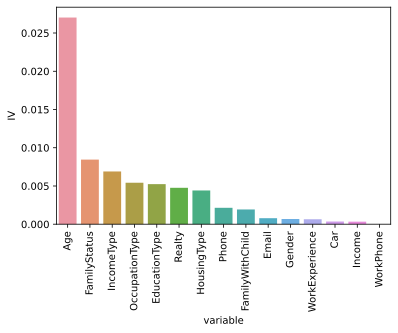

In [73]:
sns.barplot(x="variable", y="IV", data=ivtable)
plt.xticks(rotation=90)
plt.show()